In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file

time=100
lamda = 0

def get_data(filename):
    data=load_svmlight_file(filename,n_features=123)
    return data[0],data[1]

def Accuracy(X_test,w):
    t=X_test.dot(w.T) > 0
    count = 0
    for i in range(X_test.shape[0]):
        if t[i][0] == False and y_test[i]== -1:
            count = count + 1
        elif t[i][0] == True and y_test[i]== 1:
            count = count + 1
    return (count / y_test.shape[0])

X_train,y_train = get_data('a9a.txt')
X_test,y_test=get_data('a9atest.txt')

X_train=np.hstack([X_train.toarray(),np.ones((X_train.shape[0],1))])
X_test=np.hstack([X_test.toarray(),np.ones((X_test.shape[0],1))])

In [2]:
#  SGD
'''
loss_SGDhistory=[]
test_SGDhistory=[]
w=np.random.random((1,124))*0.001
learning_rate=0.001
for k in range(time):
    mask=np.random.choice(X_train.shape[0],256,replace=False)
    X_batch=X_train[mask]
    y_batch=y_train[mask]
    dw=np.zeros((1,X_batch.shape[1]))
    SGDloss = lamda * 0.5*(np.linalg.norm(w,2)**2)+np.mean(np.maximum(1-y_batch.reshape(-1,1)*(X_batch.dot(w.T)),0))
    SGDtestloss = lamda * 0.5*(np.linalg.norm(w,2)**2)+np.mean(np.maximum(1-y_test.reshape(-1,1)*(X_test.dot(w.T)),0))
    loss_SGDhistory.append(SGDloss)
    test_SGDhistory.append(SGDtestloss)
    for i in range(X_batch.shape[0]):
        if 1-y_batch[i]*(X_batch[i].dot(w.T))>=0:
            dw += -y_batch[i]*X_batch[i].reshape((1,124))
    dw= dw/X_batch.shape[0]+ lamda*w
    w=w-learning_rate*dw
'''    

'\nloss_SGDhistory=[]\ntest_SGDhistory=[]\nw=np.random.random((1,124))*0.001\nlearning_rate=0.001\nfor k in range(time):\n    mask=np.random.choice(X_train.shape[0],256,replace=False)\n    X_batch=X_train[mask]\n    y_batch=y_train[mask]\n    dw=np.zeros((1,X_batch.shape[1]))\n    SGDloss = lamda * 0.5*(np.linalg.norm(w,2)**2)+np.mean(np.maximum(1-y_batch.reshape(-1,1)*(X_batch.dot(w.T)),0))\n    SGDtestloss = lamda * 0.5*(np.linalg.norm(w,2)**2)+np.mean(np.maximum(1-y_test.reshape(-1,1)*(X_test.dot(w.T)),0))\n    loss_SGDhistory.append(SGDloss)\n    test_SGDhistory.append(SGDtestloss)\n    for i in range(X_batch.shape[0]):\n        if 1-y_batch[i]*(X_batch[i].dot(w.T))>=0:\n            dw += -y_batch[i]*X_batch[i].reshape((1,124))\n    dw= dw/X_batch.shape[0]+ lamda*w\n    w=w-learning_rate*dw\n'

In [3]:
#  NAG


gamma=0.9
learning_rate=0.05
w=np.random.random((1,124))*0.001
v=np.zeros((1,124))
loss_NAGhistory=[]
test_NAGhistory=[]

for k in range(time):
    mask=np.random.choice(X_train.shape[0],4096,replace=False)
    X_batch=X_train[mask]
    y_batch=y_train[mask]
    dw=np.zeros((1,X_batch.shape[1]))
    NAGloss = lamda * 0.5*(np.linalg.norm(w,2)**2)+np.mean(np.maximum(1-y_batch.reshape(-1,1)*(X_batch.dot(w.T)),0))
    NAGtestloss = lamda * 0.5*(np.linalg.norm(w,2)**2)+np.mean(np.maximum(1-y_test.reshape(-1,1)*(X_test.dot(w.T)),0))
    loss_NAGhistory.append(NAGloss)
    test_NAGhistory.append(NAGtestloss)
    for i in range(X_batch.shape[0]):
        if 1-y_batch[i]*(X_batch[i].dot((w-gamma*v).T))>=0:
            dw += -y_batch[i]*X_batch[i].reshape((1,124))
    dw= dw/X_batch.shape[0]+ lamda*(w-gamma*v)
    v=gamma*v+learning_rate*dw
    w=w-v
    
print(Accuracy(X_test,w))

0.8457097229899884


In [4]:
#  RMSProp

gamma=0.95
epsilon=1e-8
learning_rate=0.005
w=np.random.random((1,124))*0.001
G=np.zeros((1,124))
loss_RMSProphistory=[]
test_RMSProphistory=[]

for k in range(time):
    mask=np.random.choice(X_train.shape[0],4096,replace=False)
    X_batch=X_train[mask]
    y_batch=y_train[mask]
    dw=np.zeros((1,X_batch.shape[1]))
    RMSProploss = lamda * 0.5*(np.linalg.norm(w,2)**2)+np.mean(np.maximum(1-y_batch.reshape(-1,1)*(X_batch.dot(w.T)),0))
    RMSProptestloss = lamda * 0.5*(np.linalg.norm(w,2)**2)+np.mean(np.maximum(1-y_test.reshape(-1,1)*(X_test.dot(w.T)),0))
    loss_RMSProphistory.append(RMSProploss)
    test_RMSProphistory.append(RMSProptestloss)
    for i in range(X_batch.shape[0]):
        if 1-y_batch[i]*(X_batch[i].dot(w.T))>=0:
            dw += -y_batch[i]*X_batch[i].reshape((1,124))
    dw= dw/X_batch.shape[0]+ lamda*w
    G=gamma*G+(1-gamma)*np.multiply(dw,dw)
    w=w-np.multiply(learning_rate/np.sqrt(G+epsilon),dw)
    
print(Accuracy(X_test,w))

0.8438670843314293


In [5]:
#  AdaDelta

gamma=0.95
epsilon=1e-5
G=np.zeros((1,124))
delta_t=np.zeros((1,124))
loss_AdaDeltahistory=[]
test_AdaDeltahistory=[]
w=np.random.random((1,124))*0.001
for k in range(time):
    mask=np.random.choice(X_train.shape[0],4096,replace=False)
    X_batch=X_train[mask]
    y_batch=y_train[mask]
    dw=np.zeros((1,X_batch.shape[1]))
    AdaDeltaloss = lamda * 0.5*(np.linalg.norm(w,2)**2)+np.mean(np.maximum(1-y_batch.reshape(-1,1)*(X_batch.dot(w.T)),0))
    AdaDeltatestloss = lamda * 0.5*(np.linalg.norm(w,2)**2)+np.mean(np.maximum(1-y_test.reshape(-1,1)*(X_test.dot(w.T)),0))
    loss_AdaDeltahistory.append(AdaDeltaloss)
    test_AdaDeltahistory.append(AdaDeltatestloss)
    for i in range(X_batch.shape[0]):
        if 1-y_batch[i]*(X_batch[i].dot(w.T))>=0:
            dw += -y_batch[i]*X_batch[i].reshape((1,124))
    dw= dw/X_batch.shape[0]+ lamda*w
    G=gamma*G+(1-gamma)*np.multiply(dw,dw)
    delta_w=-np.multiply(np.sqrt(delta_t+epsilon)/np.sqrt(G+epsilon),dw)
    w=w+delta_w
    delta_t=gamma*delta_t+(1-gamma)*np.multiply(delta_w,delta_w)

print(Accuracy(X_test,w))

0.845771144278607


In [6]:
#  Adam

beta=0.9
gamma=0.999
eta=0.001
epsilon=1e-8
learning_rate=0.001
m=np.zeros((1,124))
G=np.zeros((1,124))
loss_Adamhistory=[]
test_Adamhistory=[]
w=np.random.random((1,124))*0.001
for k in range(time):
    mask=np.random.choice(X_train.shape[0],4096,replace=False)
    X_batch=X_train[mask]
    y_batch=y_train[mask]
    dw=np.zeros((1,X_batch.shape[1]))
    Adamloss = lamda * 0.5*(np.linalg.norm(w,2)**2)+np.mean(np.maximum(1-y_batch.reshape(-1,1)*(X_batch.dot(w.T)),0))
    Adamtestloss = lamda * 0.5*(np.linalg.norm(w,2)**2)+np.mean(np.maximum(1-y_test.reshape(-1,1)*(X_test.dot(w.T)),0))
    loss_Adamhistory.append(Adamloss)
    test_Adamhistory.append(Adamtestloss)
    for i in range(X_batch.shape[0]):
        if 1-y_batch[i]*(X_batch[i].dot(w.T))>=0:
            dw += -y_batch[i]*X_batch[i].reshape((1,124))
    dw= dw/X_batch.shape[0]+ lamda*w
    m=beta*m+(1-beta)*dw
    G=gamma*G+(1-gamma)*np.multiply(delta_w,delta_w)
    alpha=learning_rate*(np.sqrt(1-gamma**(k+1)))/(1-beta**(k+1))
    w=w-alpha*m/(np.sqrt(G+epsilon))

print(Accuracy(X_test,w))

0.8453411952582766


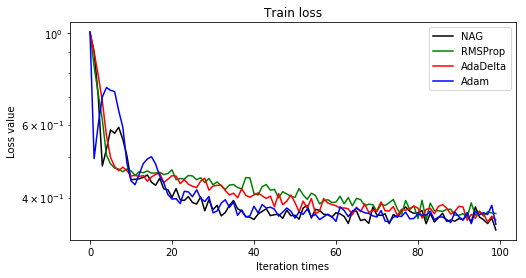

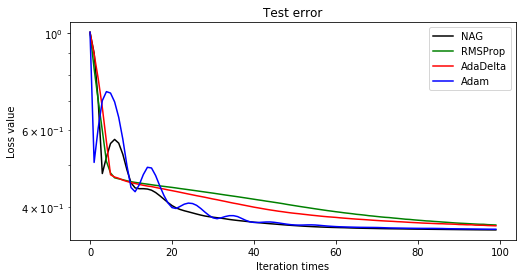

In [7]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.plot(loss_NAGhistory, 'black', label = 'NAG')
plt.plot(loss_RMSProphistory, 'green', label = 'RMSProp')
plt.plot(loss_AdaDeltahistory, 'red', label = 'AdaDelta')
plt.plot(loss_Adamhistory, 'blue', label = 'Adam')
plt.title('Train loss')
plt.yscale('log')
plt.xlabel('Iteration times')
plt.ylabel('Loss value')
plt.legend()
plt.show()

plt.plot(test_NAGhistory, 'black', label = 'NAG')
plt.plot(test_RMSProphistory, 'green', label = 'RMSProp')
plt.plot(test_AdaDeltahistory, 'red', label = 'AdaDelta')
plt.plot(test_Adamhistory, 'blue', label = 'Adam')
plt.title('Test error')
plt.yscale('log')
plt.xlabel('Iteration times')
plt.ylabel('Loss value')
plt.legend()
plt.show()